In [2]:
import os
import gc
from tqdm import tqdm
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
import math

# %matplotlib widget
basePath = "./sims.TNG/TNG100-1/output"

initial_snapshot = 69
end_snapshot = 99

halos_fields = ["GroupFirstSub", "GroupNsubs", "GroupMass", "GroupPos"]
subhalos_fields = ["SubhaloGrNr", "SubhaloMass", "SubhaloPos"]
tree_fields = ["SubfindID", "SnapNum"]

h = 0.6774  # km/Mpc

m_dm = 4.5e-5  # E10M_Sum
m_dm_h = m_dm * h

Critial_Density = 1.27e-8  # E10M_Sum/kpc^3
Critial_Density_h = Critial_Density / h**2  # E10M_Sum/(kpc/h)^3

def Detect_Mkdir(Path):
    if not (os.path.exists(Path)):
        os.makedirs(Path)
    return Path

FilePath = Detect_Mkdir(os.path.join('./TNG100_Final_File'))
Final_File_List = ['Halo_Array', 'Host_Array', 'MMS_Array', 'First_App_Snap_Array', 'First_App_Distance_Array',
                   'Snap99_Distance_Array', 'Snap99_Radial_Velocity_Array', 'Snap99_Virial_Radius_Array', 'Is_First_Approach','Is_First_Infall']
for filename in Final_File_List:
    if os.path.exists(os.path.join(FilePath, filename)+'.npy'):
        globals()[filename] = np.load(
            (os.path.join(FilePath, filename)+'.npy'))


(array([  2.,   4.,  34.,  92., 379., 702., 604., 663., 545., 342., 356.,
        259., 161.,  83.,  82.,  42.,  17.,  18.,   6.,   5.]),
 array([ 25.87890625,  30.46875   ,  35.05859375,  39.6484375 ,
         44.23828125,  48.828125  ,  53.41796875,  58.0078125 ,
         62.59765625,  67.1875    ,  71.77734375,  76.3671875 ,
         80.95703125,  85.546875  ,  90.13671875,  94.7265625 ,
         99.31640625, 103.90625   , 108.49609375, 113.0859375 ,
        117.67578125]),
 <BarContainer object of 20 artists>)

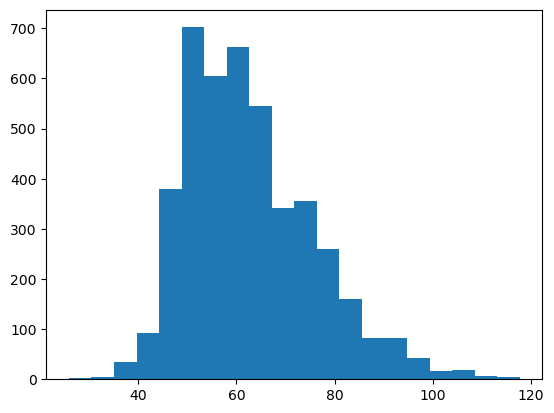

In [3]:
plt.hist(Snap99_Virial_Radius_Array,bins=20)


In [4]:
virial_radius=il.groupcat.loadHalos(basePath,99,fields=['Group_R_Crit200'])


(array([  2.,  22.,  83., 540., 885., 635., 486., 414., 307., 246., 171.,
        156., 109.,  96.,  56.,  64.,  46.,  45.,  18.,  15.]),
 array([ 67.98477936,  78.01126099,  88.03773499,  98.06421661,
        108.09069061, 118.11717224, 128.14364624, 138.17012024,
        148.1966095 , 158.2230835 , 168.2495575 , 178.27604675,
        188.30252075, 198.32899475, 208.35546875, 218.38195801,
        228.40843201, 238.43490601, 248.46138   , 258.487854  ,
        268.51434326]),
 <BarContainer object of 20 artists>)

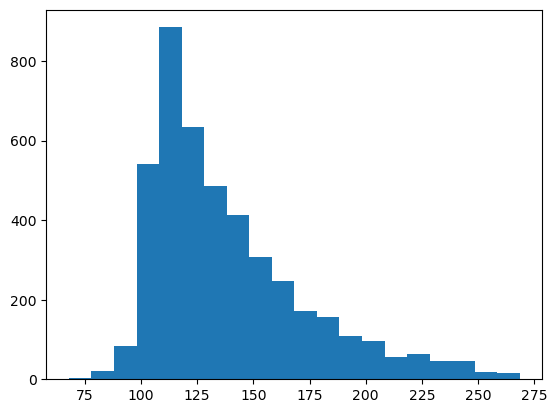

In [5]:
plt.hist(virial_radius[Halo_Array],20)
